## Web Scraping to generate data for analysis

python has a module beautifulsoup that can retrieve information from websites by making a request and returning the html code we specifically ask for. Using some well written code we can retrieve large amounts of raw information, parse through the text data, and generate large csv, json, xcel, etc.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as mp
import requests

 Ideally we want to find a website that can produce interesting data, but keep in mind there are best practices when web scraping. Our requests if they are invasive and taxing can overwhelm the website with get requests, leading to us crashing a webpage. Making sure to be careful in this regard is of utmost importance, we can get into trouble when doing things incorrectly.

 There will also be cases where you are prohibited from scraping either specifically indicated in an end user agreement or terms of service so treading cautiously here is also recommended.


In [2]:
leaders = requests.get('http://www.espn.com/nfl/weekly/leaders/_/week/1')

In [3]:
soup = BeautifulSoup(leaders.content, 'html.parser')

In [4]:
#all elements on current page which have a hyperlink taking us to a new page
soup.find_all(href=True)

[<link href="https://a.espncdn.com/favicon.ico" mask="" rel="icon" sizes="any"/>,
 <link href="http://www.espn.com/nfl/weekly/leaders/_/week/1" rel="canonical">
 <script>var _sf_startpt=(new Date()).getTime();</script>
 <link href="https://a.espncdn.com/search/opensearch.xml" rel="search" title="ESPN Search" type="application/opensearchdescription+xml"/>
 <link charset="utf-8" href="https://a.espncdn.com/combiner/c/201501211964?css=global_reset.r1.css,base.r237.css,modules.r465_2.css,global_header.r44.css,header_topbar.r1.css,modules/global_nav.r54.css,modules/insider_enhanced.r1.css,modules/mem/mem.r12.1.css,modules/mem/mem_espn360.r8.4.css,modules/mem/skirmish.r8.css,modules/twin.r1.css,modules/facebook/button.r2.css,universal_overlay/universal_overlay.css,universal_overlay/media_overlay.css,universal_overlay/video_overlay.css,universal_overlay/photo_overlay.css,universal_overlay/dyk_overlay.css,fonts/bentonsans.css,fonts/bentonsansmedium.css" media="screen" rel="stylesheet" type="te

In [5]:
urls = [a['href'] for a in soup.select('a[href*="passing"]')]
urls

['//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing']

In [6]:
passing = soup.select('a[href*=passing]')
passing

[<a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing">Passing</a>]

In [7]:
soup.a

<a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing">Passing</a>

In [8]:
soup.a.find_next_sibling('a')

<a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/rushing">Rushing</a>

In [9]:
soup.a.find_next_sibling('a').find_next_sibling('a')

<a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/receiving">Receiving</a>

In [10]:
links = [a['href'] for a in soup.find_all('a', href=True)]
prrd = links[0:4]
prrd

['//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing',
 '//www.espn.com/nfl/weekly/leaders/_/week/1/type/rushing',
 '//www.espn.com/nfl/weekly/leaders/_/week/1/type/receiving',
 '//www.espn.com/nfl/weekly/leaders/_/week/1/type/defensive']

In [11]:
passingurl= requests.get('http://www.espn.com/nfl/weekly/leaders/_/week/1/type/passing')
soup1 = BeautifulSoup(passingurl.content, 'html.parser')
soup1


<!DOCTYPE html>

<html xmlns:fb="https://www.facebook.com/2008/fbml">
<head>
<script>
(function redirectToHttpIfHttps() {
   var win      = typeof window !== 'undefined' && window,
       location = win && win.location,
       protocol = location && location.protocol;

   if (protocol === 'https:' && !false) {
        location.href = location.href.replace('https://', 'http://');
   }
})();
</script><meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://a.espncdn.com/favicon.ico" mask="" rel="icon" sizes="any"/>
<meta content="#CC0000" name="theme-color"/>
<script type="text/javascript">
    if(true && navigator && navigator.userAgent.toLowerCase().indexOf("teamstream") >= 0) {
        window.location = 'http://m.espn.com/mobilecache/general/apps/sc';
    }
</script><title>Week 1, 2022 NFL Weekly Stats Leaders - National Football League - ESPN</title>
<meta content="xuj1ODRluWa0frM-BjIr_aSHoUC7HB5C1MgmYAM_GkA" name="google-site-verif

### Finding the right data on a webpage

The html we are pulling up in the cell below belongs to the table of player statistics, in the form we pull up BeautifulSoup will give us the ability to parse through the elements in the table and with python and pandas we can create tabular data that analysis can be performed on 

In [12]:
#find all 'table' tags, go to the 6th item in the list of all tables on current page, then find all 'tr' or table rows.
soup1.find_all('table')[6].find_all('tr')

[<tr class="stathead">
 <td colspan="12">Sortable Passing Leaders</td>
 </tr>,
 <tr align="right" class="colhead">
 <td align="left" width="6%">RK</td>
 <td align="left" width="26%">PLAYER</td>
 <td align="left" width="8%">TEAM</td>
 <td align="left" width="15%">RESULT</td>
 <td><a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing/sort/comp" title="Completions">COMP</a></td><td><a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing/sort/att" title="Attempts">ATT</a></td><td><a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing/sort/yds" title="Passing yards">YDS</a></td><td><a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing/sort/td" title="Passing touchdowns">TD</a></td><td><a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing/sort/int" title="Interceptions thrown">INT</a></td><td><a href="//www.espn.com/nfl/weekly/leaders/_/week/1/type/passing/sort/sack" title="Sacks">SACK</a></td><td><a href="//www.espn.com/nfl/weekly/leaders/

### Parsing through data and recording it

this cell will parse through each table row, and record each cell value into a list. Each item in the list will correspond to seperate rows from html table.

In [13]:
# we can very easily loop through each 'tr' or table row, and within each iteration, loop over all 'td' table data in each row.
# all of this data can be recorded very easily into an empty list.

data = []
for tr in soup1.find_all('table')[6].find_all('tr'):
    row = [td.text for td in tr.find_all('td')]
    data.append(row)

In [14]:
data

[['Sortable Passing Leaders'],
 ['RK',
  'PLAYER',
  'TEAM',
  'RESULT',
  'COMP',
  'ATT',
  'YDS',
  'TD',
  'INT',
  'SACK',
  'FUM',
  'RAT'],
 ['1',
  'Patrick Mahomes, QB',
  'KC',
  'W 44-21  at ARI',
  '30',
  '39',
  '360',
  '5',
  '0',
  '0',
  '0',
  '144.2'],
 ['2',
  'Matt Ryan, QB',
  'IND',
  'T 20-20  at HOU',
  '32',
  '50',
  '352',
  '1',
  '1',
  '2',
  '1',
  '83.1'],
 ['3',
  'Russell Wilson, QB',
  'DEN',
  'L 17-16  at SEA',
  '29',
  '42',
  '340',
  '1',
  '0',
  '2',
  '0',
  '101.3'],
 ['4',
  'Joe Burrow, QB',
  'CIN',
  'L 23-20  vs. PIT',
  '33',
  '53',
  '338',
  '2',
  '4',
  '7',
  '1',
  '61.7'],
 ['5',
  'Carson Wentz, QB',
  'WSH',
  'W 28-22  vs. JAX',
  '27',
  '41',
  '313',
  '4',
  '2',
  '1',
  '0',
  '101.0'],
 ['6',
  'Joe Flacco, QB',
  'NYJ',
  'L 24-9  vs. BAL',
  '37',
  '59',
  '309',
  '1',
  '1',
  '3',
  '0',
  '74.8'],
 ['7',
  'Josh Allen, QB',
  'BUF',
  'W 31-10  at LAR',
  '26',
  '31',
  '297',
  '3',
  '2',
  '2',
  '0',
  '

In [15]:
del data[0]
data

[['RK',
  'PLAYER',
  'TEAM',
  'RESULT',
  'COMP',
  'ATT',
  'YDS',
  'TD',
  'INT',
  'SACK',
  'FUM',
  'RAT'],
 ['1',
  'Patrick Mahomes, QB',
  'KC',
  'W 44-21  at ARI',
  '30',
  '39',
  '360',
  '5',
  '0',
  '0',
  '0',
  '144.2'],
 ['2',
  'Matt Ryan, QB',
  'IND',
  'T 20-20  at HOU',
  '32',
  '50',
  '352',
  '1',
  '1',
  '2',
  '1',
  '83.1'],
 ['3',
  'Russell Wilson, QB',
  'DEN',
  'L 17-16  at SEA',
  '29',
  '42',
  '340',
  '1',
  '0',
  '2',
  '0',
  '101.3'],
 ['4',
  'Joe Burrow, QB',
  'CIN',
  'L 23-20  vs. PIT',
  '33',
  '53',
  '338',
  '2',
  '4',
  '7',
  '1',
  '61.7'],
 ['5',
  'Carson Wentz, QB',
  'WSH',
  'W 28-22  vs. JAX',
  '27',
  '41',
  '313',
  '4',
  '2',
  '1',
  '0',
  '101.0'],
 ['6',
  'Joe Flacco, QB',
  'NYJ',
  'L 24-9  vs. BAL',
  '37',
  '59',
  '309',
  '1',
  '1',
  '3',
  '0',
  '74.8'],
 ['7',
  'Josh Allen, QB',
  'BUF',
  'W 31-10  at LAR',
  '26',
  '31',
  '297',
  '3',
  '2',
  '2',
  '0',
  '112.0'],
 ['8',
  'Derek Carr, 

In [16]:
columns = data[0]
del data[0]
data

[['1',
  'Patrick Mahomes, QB',
  'KC',
  'W 44-21  at ARI',
  '30',
  '39',
  '360',
  '5',
  '0',
  '0',
  '0',
  '144.2'],
 ['2',
  'Matt Ryan, QB',
  'IND',
  'T 20-20  at HOU',
  '32',
  '50',
  '352',
  '1',
  '1',
  '2',
  '1',
  '83.1'],
 ['3',
  'Russell Wilson, QB',
  'DEN',
  'L 17-16  at SEA',
  '29',
  '42',
  '340',
  '1',
  '0',
  '2',
  '0',
  '101.3'],
 ['4',
  'Joe Burrow, QB',
  'CIN',
  'L 23-20  vs. PIT',
  '33',
  '53',
  '338',
  '2',
  '4',
  '7',
  '1',
  '61.7'],
 ['5',
  'Carson Wentz, QB',
  'WSH',
  'W 28-22  vs. JAX',
  '27',
  '41',
  '313',
  '4',
  '2',
  '1',
  '0',
  '101.0'],
 ['6',
  'Joe Flacco, QB',
  'NYJ',
  'L 24-9  vs. BAL',
  '37',
  '59',
  '309',
  '1',
  '1',
  '3',
  '0',
  '74.8'],
 ['7',
  'Josh Allen, QB',
  'BUF',
  'W 31-10  at LAR',
  '26',
  '31',
  '297',
  '3',
  '2',
  '2',
  '0',
  '112.0'],
 ['8',
  'Derek Carr, QB',
  'LV',
  'L 24-19  at LAC',
  '22',
  '37',
  '295',
  '2',
  '3',
  '5',
  '0',
  '69.1'],
 ['9',
  'Justin H

In [17]:
columns

['RK',
 'PLAYER',
 'TEAM',
 'RESULT',
 'COMP',
 'ATT',
 'YDS',
 'TD',
 'INT',
 'SACK',
 'FUM',
 'RAT']

Now we can fill a pandas dataframe with the data in the python list.

In [18]:
df = pd.DataFrame(data, columns = columns)

In [19]:
df.head()

,RK,PLAYER,TEAM,RESULT,COMP,ATT,YDS,TD,INT,SACK,FUM,RAT
0,1,"Patrick Mahomes, QB",KC,W 44-21 at ARI,30,39,360,5,0,0,0,144.2
1,2,"Matt Ryan, QB",IND,T 20-20 at HOU,32,50,352,1,1,2,1,83.1
2,3,"Russell Wilson, QB",DEN,L 17-16 at SEA,29,42,340,1,0,2,0,101.3
3,4,"Joe Burrow, QB",CIN,L 23-20 vs. PIT,33,53,338,2,4,7,1,61.7
4,5,"Carson Wentz, QB",WSH,W 28-22 vs. JAX,27,41,313,4,2,1,0,101.0


### Make life easier

Lets find a way to scrub through multiple pages and record the data from the tables just as before 

In [20]:
w=1
element = soup1.select('a[href*="2"]')[0] #looking for href that leads to next weeks tab while currently sitting on first page
while element.find_next_sibling('a'):
    element = element.find_next_sibling('a')
    w+=1                                  #should in total equal number of links to each weekly report from all games played

In [21]:
w

13

In [22]:
all_list=[[] for week in range(1, w+1)]

In [23]:
len(all_list)

13

In [24]:
#lets make a loop that navigates through each weekly link, then loops through and records html tables holding player stats

for index, week in enumerate(all_list):
    passingurl=requests.get('http://www.espn.com/nfl/weekly/leaders/_/week/'+ str(index+1) + '/type/passing') 
    soup=BeautifulSoup(passingurl.content, 'html.parser')
    for tr in soup.find_all('table')[6].find_all('tr'):
        row=[td.text for td in tr.find_all('td')]
        week.append(row)

In [25]:
all_list[9]

[['Sortable Passing Leaders'],
 ['RK',
  'PLAYER',
  'TEAM',
  'RESULT',
  'COMP',
  'ATT',
  'YDS',
  'TD',
  'INT',
  'SACK',
  'FUM',
  'RAT'],
 ['1',
  'Kirk Cousins, QB',
  'MIN',
  'W 33-30  at BUF',
  '30',
  '50',
  '357',
  '1',
  '2',
  '4',
  '0',
  '71.8'],
 ['2',
  'Patrick Mahomes, QB',
  'KC',
  'W 27-17  vs. JAX',
  '26',
  '35',
  '331',
  '4',
  '1',
  '0',
  '0',
  '129.6'],
 ['3',
  'Josh Allen, QB',
  'BUF',
  'L 33-30  vs. MIN',
  '29',
  '43',
  '330',
  '1',
  '2',
  '2',
  '1',
  '78.6'],
 ['4',
  'Davis Mills, QB',
  'HOU',
  'L 24-16  at NYG',
  '22',
  '37',
  '319',
  '1',
  '1',
  '4',
  '0',
  '85.3'],
 ['5',
  'Russell Wilson, QB',
  'DEN',
  'L 17-10  at TEN',
  '21',
  '42',
  '286',
  '1',
  '1',
  '6',
  '0',
  '70.1'],
 ['6',
  'Tua Tagovailoa, QB',
  'MIA',
  'W 39-17  vs. CLE',
  '25',
  '32',
  '285',
  '3',
  '0',
  '0',
  '0',
  '135.0'],
 ['7',
  'Geno Smith, QB',
  'SEA',
  'L 21-16  at TB',
  '23',
  '33',
  '275',
  '2',
  '0',
  '3',
  '1'

In [26]:
#now we can make dataframes to transfer information currently being held in lists.

d={}
for case in range(1, w+1):
    d[case]=pd.DataFrame()

In [27]:
d[1]

""


In [28]:
#entering our weekly tables into empty dataframes and cleaning things up a little.

for index, week in enumerate(all_list, start=1):
    del week[0]
    columns = week[0]
    del week[0]
    d[index]=pd.DataFrame(week, columns=columns)

In [29]:
# adding in new columns for each type of fantasy point/s earned aswell as a total fantasy score.
# all relevant columns will need to be changed to int values as opposed to strings.

for index in range(1,w+1):
    d[index]['YDS']=pd.to_numeric(d[index]['YDS'])
    d[index]['INT']=pd.to_numeric(d[index]['INT'])
    d[index]['SACK']=pd.to_numeric(d[index]['SACK'])
    d[index]['FUM']=pd.to_numeric(d[index]['FUM'])
    d[index]['TD']=pd.to_numeric(d[index]['TD'])

In [30]:
# Each way of scoring can then be added as a new column to the dataframe by simple arithmetic operations

for index in range(1,w+1):
    d[index]['FYDS']=d[index]['YDS']/25
    d[index]['FINT']=d[index]['INT']*(-1)
    d[index]['FFUM']=d[index]['FUM']*(-2)
    d[index]['FTD']=d[index]['TD']*4

In [31]:
for index in range(1,w+1):
    d[index]['FS']=d[index]['FYDS']-d[index]['FINT']-d[index]['FFUM']+d[index]['FTD']

In [32]:
playerDF=pd.DataFrame()

In [33]:
d[1].loc[d[1]['PLAYER']=='Patrick Mahomes, QB']

,RK,PLAYER,TEAM,RESULT,COMP,ATT,YDS,TD,INT,SACK,FUM,RAT,FYDS,FINT,FFUM,FTD,FS
0,1,"Patrick Mahomes, QB",KC,W 44-21 at ARI,30,39,360,5,0,0,0,144.2,14.4,0,0,20,34.4


In [34]:
pmahomes_list=[]
for i in range(1, w+1):
    pmahomes_list.append(d[i].loc[d[i]['PLAYER']=='Patrick Mahomes, QB'])
pmahomes_list

[  RK               PLAYER TEAM           RESULT COMP ATT  YDS  TD  INT  SACK  \
 0  1  Patrick Mahomes, QB   KC  W 44-21  at ARI   30  39  360   5    0     0   
 
    FUM    RAT  FYDS  FINT  FFUM  FTD    FS  
 0    0  144.2  14.4     0     0   20  34.4  ,
     RK               PLAYER TEAM            RESULT COMP ATT  YDS  TD  INT  \
 15  16  Patrick Mahomes, QB   KC  W 27-24  vs. LAC   24  35  235   2    0   
 
     SACK  FUM    RAT  FYDS  FINT  FFUM  FTD    FS  
 15     1    0  106.2   9.4     0     0    8  17.4  ,
     RK               PLAYER TEAM           RESULT COMP ATT  YDS  TD  INT  \
 13  14  Patrick Mahomes, QB   KC  L 20-17  at IND   20  35  262   1    1   
 
     SACK  FUM   RAT   FYDS  FINT  FFUM  FTD     FS  
 13     1    0  78.5  10.48    -1     0    4  15.48  ,
     RK               PLAYER TEAM          RESULT COMP ATT  YDS  TD  INT  SACK  \
 10  11  Patrick Mahomes, QB   KC  W 41-31  at TB   23  37  249   3    1     3   
 
     FUM   RAT  FYDS  FINT  FFUM  FTD     FS  


In [35]:
pmahomes=pd.concat(entry for entry in pmahomes_list)
pmahomes

,RK,PLAYER,TEAM,RESULT,COMP,ATT,YDS,TD,INT,SACK,FUM,RAT,FYDS,FINT,FFUM,FTD,FS
0,1,"Patrick Mahomes, QB",KC,W 44-21 at ARI,30,39,360,5,0,0,0,144.2,14.40,0,0,20,34.40
15,16,"Patrick Mahomes, QB",KC,W 27-24 vs. LAC,24,35,235,2,0,1,0,106.2,9.40,0,0,8,17.40
13,14,"Patrick Mahomes, QB",KC,L 20-17 at IND,20,35,262,1,1,1,0,78.5,10.48,-1,0,4,15.48
10,11,"Patrick Mahomes, QB",KC,W 41-31 at TB,23,37,249,3,1,3,0,97.7,9.96,-1,0,12,22.96
6,7,"Patrick Mahomes, QB",KC,W 30-29 vs. LV,29,43,292,4,0,3,0,117.6,11.68,0,0,16,27.68
1,2,"Patrick Mahomes, QB",KC,L 24-20 vs. BUF,25,40,338,2,2,3,0,85.2,13.52,-2,0,8,23.52
1,2,"Patrick Mahomes, QB",KC,W 44-23 at SF,25,34,423,3,1,1,0,132.4,16.92,-1,0,12,29.92
0,1,"Patrick Mahomes, QB",KC,W 20-17 vs. TEN,43,68,446,1,1,4,0,80.9,17.84,-1,0,4,22.84
1,2,"Patrick Mahomes, QB",KC,W 27-17 vs. JAX,26,35,331,4,1,0,0,129.6,13.24,-1,0,16,30.24
3,4,"Patrick Mahomes, QB",KC,W 30-27 at LAC,20,34,329,3,0,1,0,120.8,13.16,0,0,12,25.16


In [36]:
pmahomes['index']=np.arange(1, pmahomes.shape[0]+1)
pmahomes.set_index('index', inplace=True)
pmahomes['WEEK']=np.arange(1, pmahomes.shape[0]+1)
pmahomes

,RK,PLAYER,TEAM,RESULT,COMP,ATT,YDS,TD,INT,SACK,FUM,RAT,FYDS,FINT,FFUM,FTD,FS,WEEK
index,,,,,,,,,,,,,,,,,,
1,1,"Patrick Mahomes, QB",KC,W 44-21 at ARI,30,39,360,5,0,0,0,144.2,14.40,0,0,20,34.40,1
2,16,"Patrick Mahomes, QB",KC,W 27-24 vs. LAC,24,35,235,2,0,1,0,106.2,9.40,0,0,8,17.40,2
3,14,"Patrick Mahomes, QB",KC,L 20-17 at IND,20,35,262,1,1,1,0,78.5,10.48,-1,0,4,15.48,3
4,11,"Patrick Mahomes, QB",KC,W 41-31 at TB,23,37,249,3,1,3,0,97.7,9.96,-1,0,12,22.96,4
5,7,"Patrick Mahomes, QB",KC,W 30-29 vs. LV,29,43,292,4,0,3,0,117.6,11.68,0,0,16,27.68,5
6,2,"Patrick Mahomes, QB",KC,L 24-20 vs. BUF,25,40,338,2,2,3,0,85.2,13.52,-2,0,8,23.52,6
7,2,"Patrick Mahomes, QB",KC,W 44-23 at SF,25,34,423,3,1,1,0,132.4,16.92,-1,0,12,29.92,7
8,1,"Patrick Mahomes, QB",KC,W 20-17 vs. TEN,43,68,446,1,1,4,0,80.9,17.84,-1,0,4,22.84,8
9,2,"Patrick Mahomes, QB",KC,W 27-17 vs. JAX,26,35,331,4,1,0,0,129.6,13.24,-1,0,16,30.24,9


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='WEEK', ylabel='FS'>

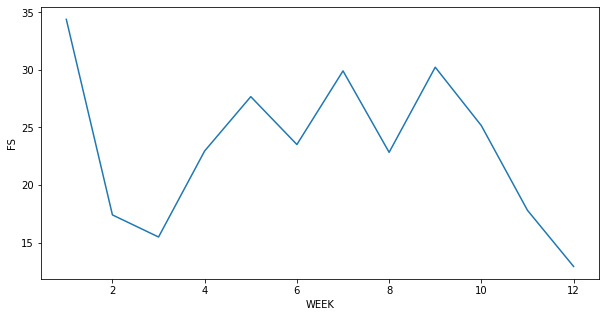

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(x='WEEK', y='FS', data=pmahomes)

In [39]:
tbrady_list=[]
for i in range(1, w+1):
    tbrady_list.append(d[i].loc[d[i]['PLAYER']=='Tom Brady, QB'])
tbrady_list

[    RK         PLAYER TEAM          RESULT COMP ATT  YDS  TD  INT  SACK  FUM  \
 22  23  Tom Brady, QB   TB  W 19-3  at DAL   18  27  212   1    1     2    0   
 
      RAT  FYDS  FINT  FFUM  FTD     FS  
 22  87.3  8.48    -1     0    4  13.48  ,
     RK         PLAYER TEAM          RESULT COMP ATT  YDS  TD  INT  SACK  FUM  \
 24  25  Tom Brady, QB   TB  W 20-10  at NO   18  34  190   1    0     1    1   
 
      RAT  FYDS  FINT  FFUM  FTD    FS  
 24  79.3   7.6     0    -2    4  13.6  ,
     RK         PLAYER TEAM           RESULT COMP ATT  YDS  TD  INT  SACK  FUM  \
 11  12  Tom Brady, QB   TB  L 14-12  vs. GB   31  42  271   1    0     3    0   
 
      RAT   FYDS  FINT  FFUM  FTD     FS  
 11  98.4  10.84     0     0    4  14.84  ,
   RK         PLAYER TEAM           RESULT COMP ATT  YDS  TD  INT  SACK  FUM  \
 0  1  Tom Brady, QB   TB  L 41-31  vs. KC   39  52  385   3    0     1    1   
 
      RAT  FYDS  FINT  FFUM  FTD    FS  
 0  114.7  15.4     0    -2   12  29.4  ,
   RK 

In [40]:
tbrady=pd.concat(entry for entry in tbrady_list)
tbrady

,RK,PLAYER,TEAM,RESULT,COMP,ATT,YDS,TD,INT,SACK,FUM,RAT,FYDS,FINT,FFUM,FTD,FS
22,23,"Tom Brady, QB",TB,W 19-3 at DAL,18,27,212,1,1,2,0,87.3,8.48,-1,0,4,13.48
24,25,"Tom Brady, QB",TB,W 20-10 at NO,18,34,190,1,0,1,1,79.3,7.60,0,-2,4,13.60
11,12,"Tom Brady, QB",TB,L 14-12 vs. GB,31,42,271,1,0,3,0,98.4,10.84,0,0,4,14.84
0,1,"Tom Brady, QB",TB,L 41-31 vs. KC,39,52,385,3,0,1,1,114.7,15.40,0,-2,12,29.40
2,3,"Tom Brady, QB",TB,W 21-15 vs. ATL,35,52,351,1,0,0,0,92.7,14.04,0,0,4,18.04
10,11,"Tom Brady, QB",TB,L 20-18 at PIT,25,40,243,1,0,2,0,87.8,9.72,0,0,4,13.72
7,8,"Tom Brady, QB",TB,L 21-3 at CAR,32,49,290,0,0,1,0,81.2,11.60,0,0,0,11.60
3,4,"Tom Brady, QB",TB,L 27-22 vs. BAL,26,44,325,1,0,3,0,89.7,13.00,0,0,4,17.00
3,4,"Tom Brady, QB",TB,W 16-13 vs. LAR,36,58,280,1,0,1,0,79.7,11.20,0,0,4,15.20
9,10,"Tom Brady, QB",TB,W 21-16 vs. SEA,22,29,258,2,1,0,0,111.0,10.32,-1,0,8,19.32


In [41]:
tbrady['index']=np.arange(1, tbrady.shape[0]+1)
tbrady.set_index('index', inplace=True)
tbrady['WEEK']=np.arange(1, tbrady.shape[0]+1)
tbrady

,RK,PLAYER,TEAM,RESULT,COMP,ATT,YDS,TD,INT,SACK,FUM,RAT,FYDS,FINT,FFUM,FTD,FS,WEEK
index,,,,,,,,,,,,,,,,,,
1,23,"Tom Brady, QB",TB,W 19-3 at DAL,18,27,212,1,1,2,0,87.3,8.48,-1,0,4,13.48,1
2,25,"Tom Brady, QB",TB,W 20-10 at NO,18,34,190,1,0,1,1,79.3,7.60,0,-2,4,13.60,2
3,12,"Tom Brady, QB",TB,L 14-12 vs. GB,31,42,271,1,0,3,0,98.4,10.84,0,0,4,14.84,3
4,1,"Tom Brady, QB",TB,L 41-31 vs. KC,39,52,385,3,0,1,1,114.7,15.40,0,-2,12,29.40,4
5,3,"Tom Brady, QB",TB,W 21-15 vs. ATL,35,52,351,1,0,0,0,92.7,14.04,0,0,4,18.04,5
6,11,"Tom Brady, QB",TB,L 20-18 at PIT,25,40,243,1,0,2,0,87.8,9.72,0,0,4,13.72,6
7,8,"Tom Brady, QB",TB,L 21-3 at CAR,32,49,290,0,0,1,0,81.2,11.60,0,0,0,11.60,7
8,4,"Tom Brady, QB",TB,L 27-22 vs. BAL,26,44,325,1,0,3,0,89.7,13.00,0,0,4,17.00,8
9,4,"Tom Brady, QB",TB,W 16-13 vs. LAR,36,58,280,1,0,1,0,79.7,11.20,0,0,4,15.20,9


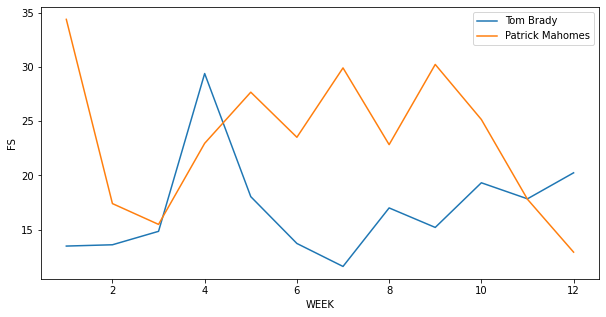

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(x='WEEK',y='FS',data=tbrady, label='Tom Brady')
sns.lineplot(x='WEEK', y='FS', data=pmahomes, label='Patrick Mahomes')
plt.legend()

<AxesSubplot:xlabel='FS', ylabel='PLAYER'>

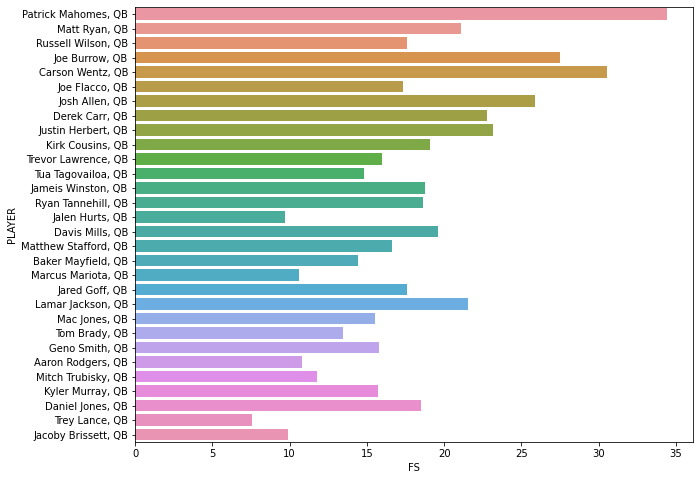

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(x=d[1]['FS'], y=d[1]['PLAYER'])

## Visualizations

We now have a fantastic way of visually interpretting data!

But what about trying to forecast?

### Data has been scraped and adjusted. Analysis can now be performed.

#### The goal in this case is to see if there is a way to accurately predict trends in the weekly leaders and how they score in a standard fantasy league.

---

In this set of data we are concerned with weekly changes in athletes performance. In other words in essence we are attempting to model time series data. Each week each athlete generates a new set of metrics and those weekly trends can reveal patterns in the overall performance. In theory having a way of looking forward one weeks time should provide some predictive capability in selection of a fantasy lineup.

Performing time series analysis in addition to building a time series forcasting model would be a logical place to start.

Autoregressive Integrated Moving Average or (ARIMA) is one of the leading time series analysis methods that allow for accurate forecasting and will be what is implemented here.

---

In [44]:
from sktime.forecasting.arima import ARIMA
from sktime.utils.plotting import plot_series

Lets try to differentiate different model varieties. Sktimes arima function allows us to adjust each paramater of the model individually. Starting with only an autoregressive model (1,0,0)

An autoregressive model of order p can be written as a regression model based on its own previous values. 

$$y_t=c+\phi_1*y_{t-1}+\phi_2*y_{t-2}+....+\phi_p*y_{t-p}+\epsilon_t $$

Moving Average models work in a similar fashion to an autoregressive model the exception being that the parameters are not using past observations as input but the past error estimates. Careful to take note, this is technically not a 'regression'.(0,0,1)

$$y_t=c+\epsilon_t+\theta_1*\epsilon_{t-1}+\theta_2*\epsilon_{t-2}+....+\theta_q*\epsilon_{t-q}+\epsilon_t$$

There also exists a process known as differencing, when attempting to forecast data using models its quite important that data does not exhibit changes(trend) or seasonality they reduce the accuracy of predictions. Transforming the data like log transformations aswell as using special techniques like differencing will help to return data to a form that can be fed into the built models.

Differencing is simply changing each new observation by subtracting the last observed value. In the sense of an equation we have...
$$ y'_t=y_t-y_{t-1}$$

All of these models and their orders can be combined to create models like ARMA or ARIMA for example.

In [45]:
ARmodel=ARIMA(order=(1,0,0))
MAmodel=ARIMA(order=(0,0,1))
ARMAmodel=ARIMA(order=(1,0,1))
ARIMAmodel=ARIMA(order=(1,1,1))

Lets plug one of the players fantasy scores into some models, lets try Patrick Mahomes

In [46]:
ARmodel.fit(pmahomes['FS'])
ypred=ARmodel.predict(fh=[1,2,3])

C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [47]:
ypred

13    21.961406
14    23.178374
15    23.342177
dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='FS'>)

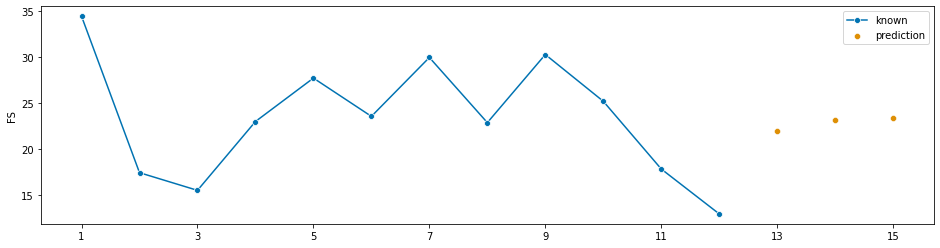

In [48]:
plot_series(pmahomes['FS'], ypred, labels=["known", "prediction"])

In [49]:
ARMAmodel.fit(pmahomes['FS'])
ARMApred=ARMAmodel.predict(fh=[1,2,3])

C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [50]:
ARMApred

13    21.498271
14    23.697406
15    23.379100
dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='FS'>)

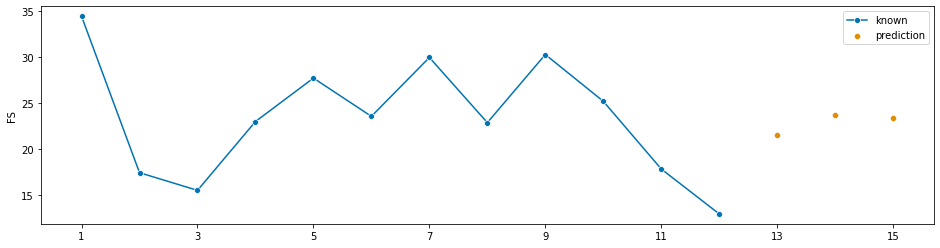

In [51]:
plot_series(pmahomes['FS'], ARMApred, labels=['known', 'prediction'])

In [52]:
MAmodel.fit(pmahomes['FS'])
ypredma=MAmodel.predict(fh=[1,2,3])

C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [53]:
ypredma

13    21.072109
14    23.424382
15    23.424382
dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='FS'>)

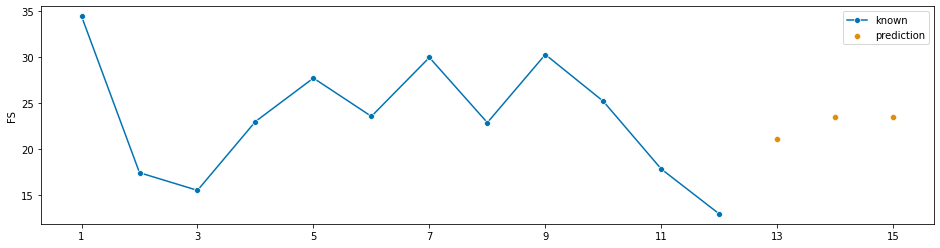

In [54]:
plot_series(pmahomes['FS'], ypredma, labels=['known','prediction'])

In [55]:
ARIMAmodel.fit(pmahomes['FS'])
ARIMApred=ARIMAmodel.predict(fh=[1,2,3])

C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sjmif\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [56]:
ARIMApred

13    15.264540
14    15.716345
15    15.381095
dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='FS'>)

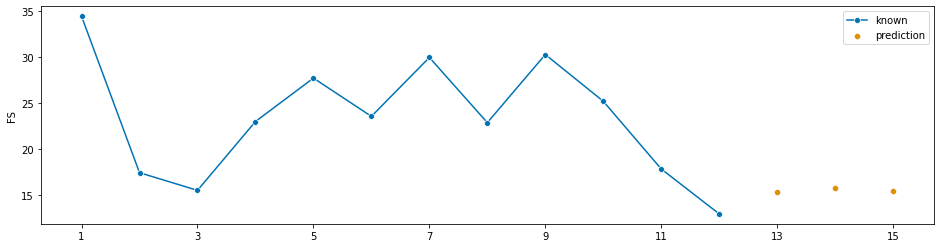

In [57]:
plot_series(pmahomes['FS'], ARIMApred, labels=['known', 'prediction'])